<a href="https://colab.research.google.com/github/RatanakamonS/DADS5001-PART1/blob/main/week6/LogScale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This short example shows what is the log scale and how/when to use it in our data visualization.

In [ ]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# conda install -c anaconda seaborn
import seaborn as sns
sns.set()  # Plot using the seaborn style

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )
print( f"Seaborn {sns.__version__}" )

Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Pandas 2.1.4
NumPy 1.26.4
IPython 7.34.0
Matplotlib 3.7.1
Seaborn 0.13.1


# 1. Linear scale vs. Logarithm scale

**Why not linear scale?**
- When the data grows very quickly (e.g., exponential growth) or when the gap between data is very large, using linear scale makes the small values almost unnoticeable (because they are too small compared to the largest value).

**Why log scale?**
- Log scales show relative values instead of absolute ones. <u>The same distance on a log scale shows the same percentage growth or decline</u>.
- <u>If you see a straight line in a log-scaled chart, something grows exponentially</u>.
- <u>Log scales can’t start at zero</u> because the distance between 1e-6 and 1e-7 is as big as the distance between 100 and 1000.
  - If you have a value that approaches zero, it will spike down way off the bottom of your graph (infinitely downward). Because when you take "log(approaching zero)" you get "approaching negative infinity".
  - Symmetrical log (symlog) would help you out in situations where you want to have a log graph, but when the value may sometimes go down towards, or to, zero. Continue reading in https://stackoverflow.com/questions/3305865/what-is-the-difference-between-log-and-symlog


**Recommended reading:**
- Part 1: https://blog.datawrapper.de/weeklychart-logscale/
- Part 2: https://blog.datawrapper.de/weeklychart-logscale2/
- Part 3: https://blog.datawrapper.de/weeklychart-logscale3/

# 2. Plot with a log scale

| | Matplotlib's pyplot | Pandas's .plot() | Seaborn |
|---|---|---|---|
| Use log-scale on x-axis only | `plt.xscale('log')` | `df.plot(..., logx=True,...)` | Set with matplotlib |
| | `ax.set_xscale('log')` | | |
| Use log-scale on y-axis only | `plt.yscale('log')` | `df.plot(..., logy=True,...)` | Set with matplotlib |
| | `ax.set_yscale('log')` | | |
| Use log-scale on both axes | Just set both scales to `'log'` | `df.plot(..., loglog=True,...)` | Set with matplotlib |


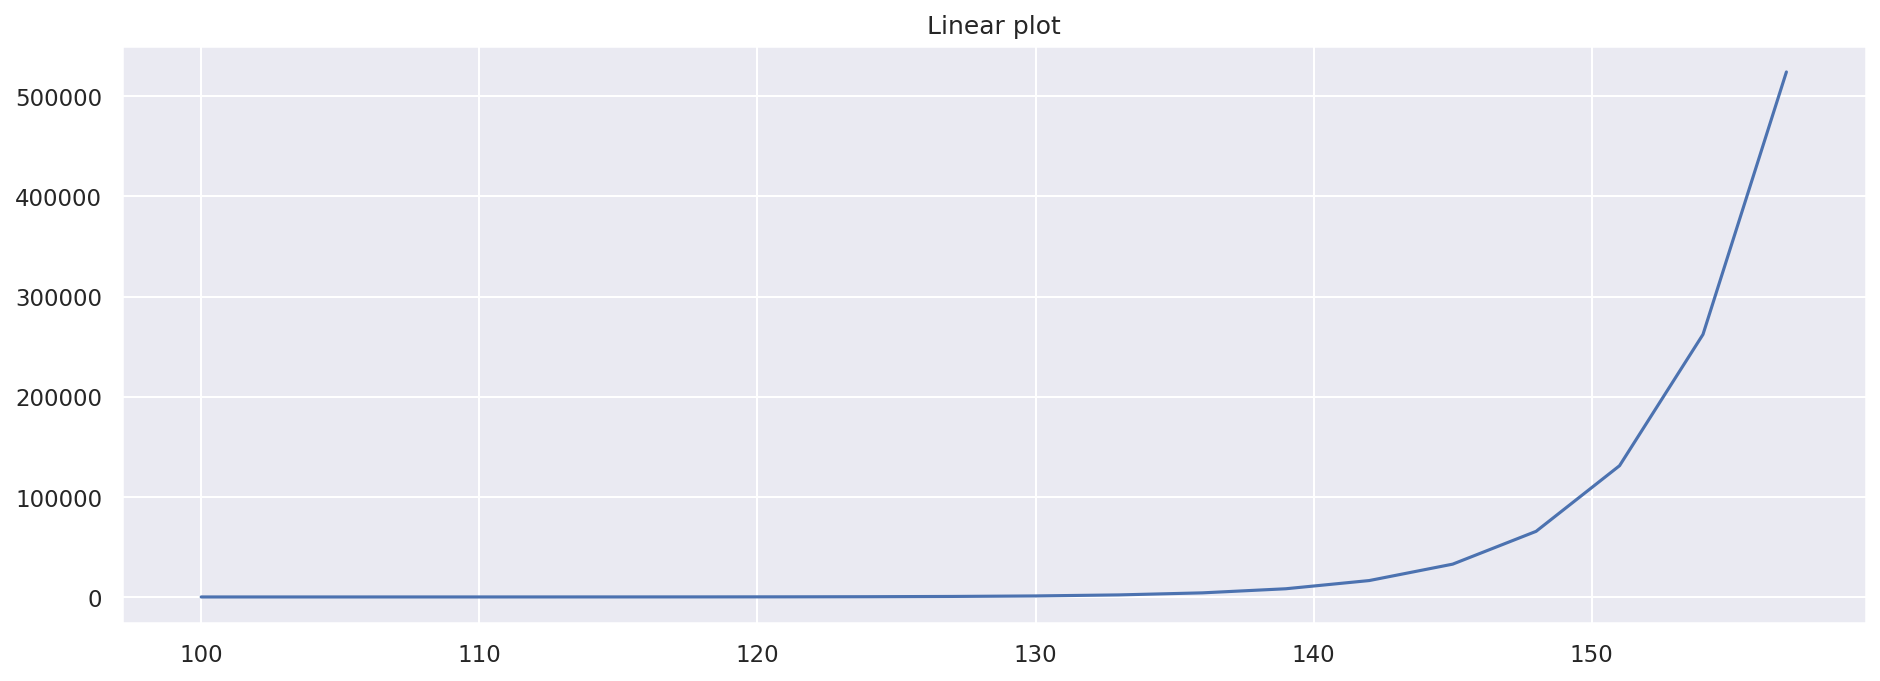

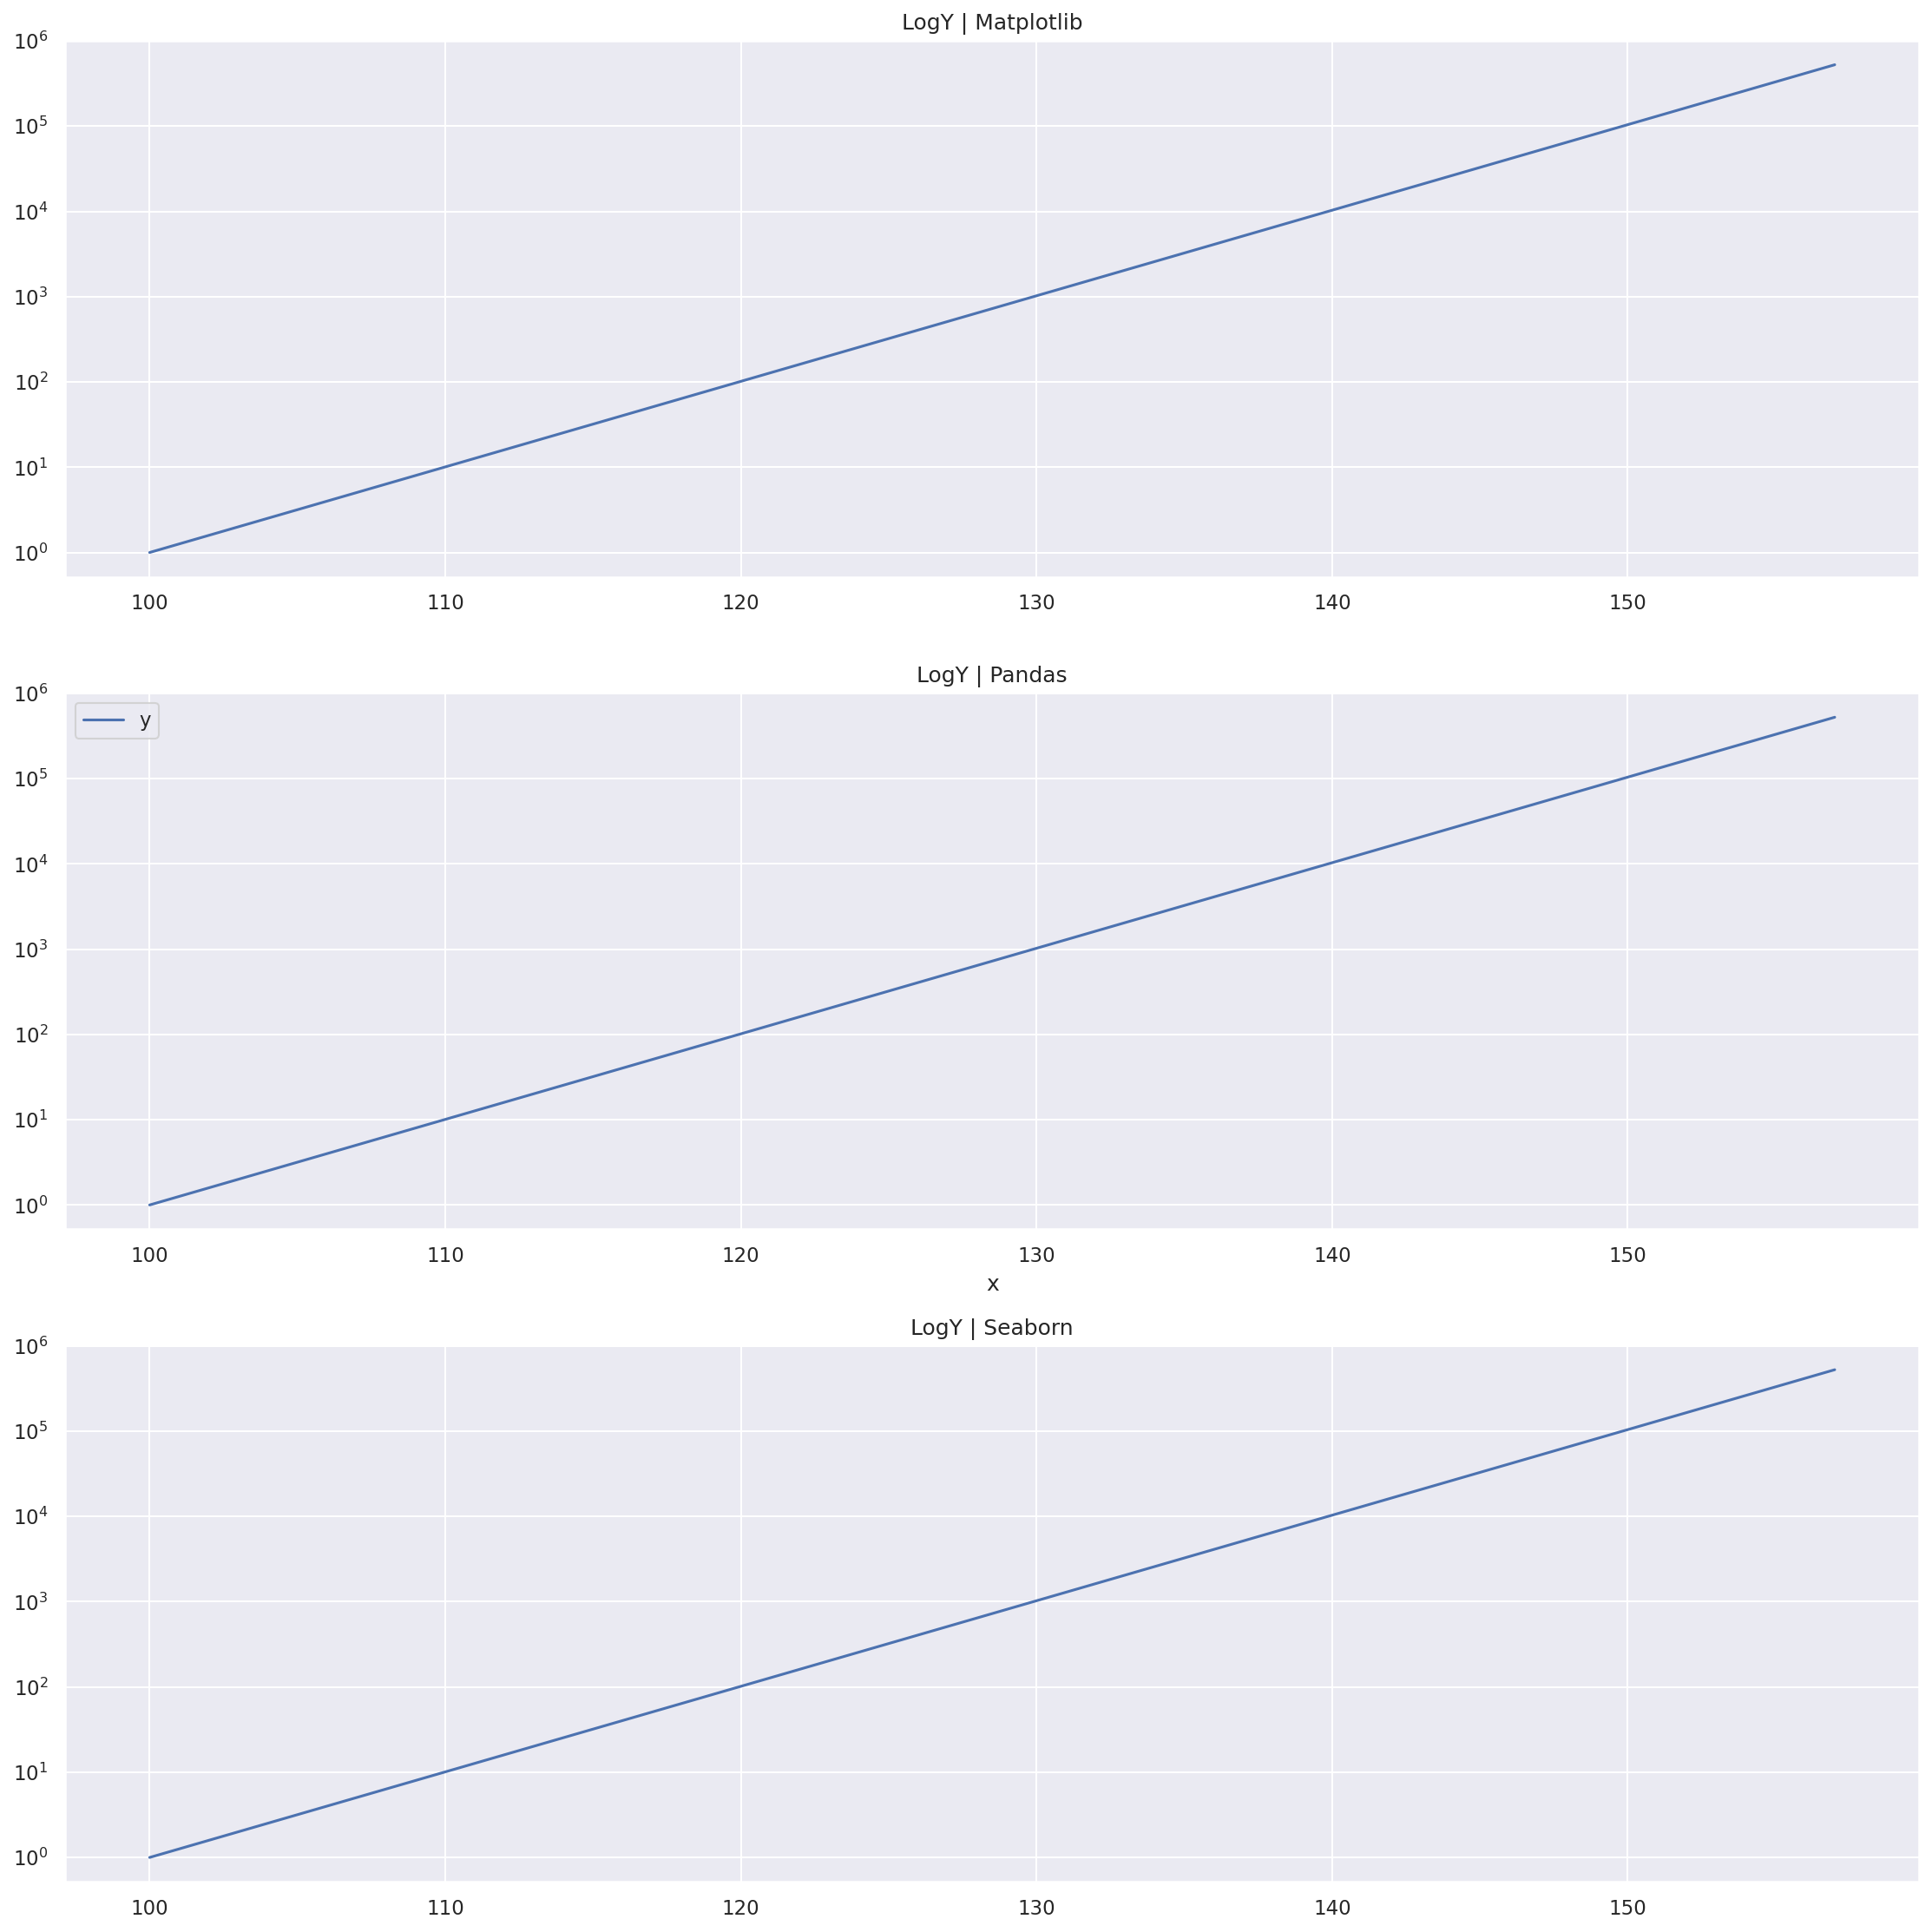

In [ ]:
# Log scale on y-axis only

# Prepare data
x = [ ((3*i) + 100) for i in range(20) ]  # Linear growth
y = [ 2**i for i in range(20) ]           # Exponential growth

# Plot one separated graph with linear scale (for comparison)
plt.figure(figsize=(15,5),dpi=150)
plt.title('Linear plot')
plt.plot(x,y)
plt.show()

# Prepare the subplots of 3 rows and 1 column
nrows, ncols = 3,1
fig, ax = plt.subplots(nrows, ncols)
fig.set_size_inches(15,15)
fig.set_dpi(150)

# Iterate to plot each subplot
titles = {(0,0):'LogY | Matplotlib', (1,0):'LogY | Pandas', (2,0):'LogY | Seaborn' }
for i in range(nrows):
  for j in range(ncols):
    # Set title of a particular subplot
    ax[i].set_title(titles[(i,j)])

    # Plot
    if i==0:    # matplotlib
      ax[i].plot(x,y)
      ax[i].set_yscale('log')   # default:base=10
    elif i==1:  # pandas
      df = pd.DataFrame( {'x':x, 'y':y} )
      df.plot(x='x', y='y', logy=True, ax=ax[i])
    elif i==2:  # seaborn
      sns.lineplot(x=x, y=y, ax=ax[i])
      ax[i].set_yscale('log')   # default:base=10

# Show the figure with subplots
fig.tight_layout()

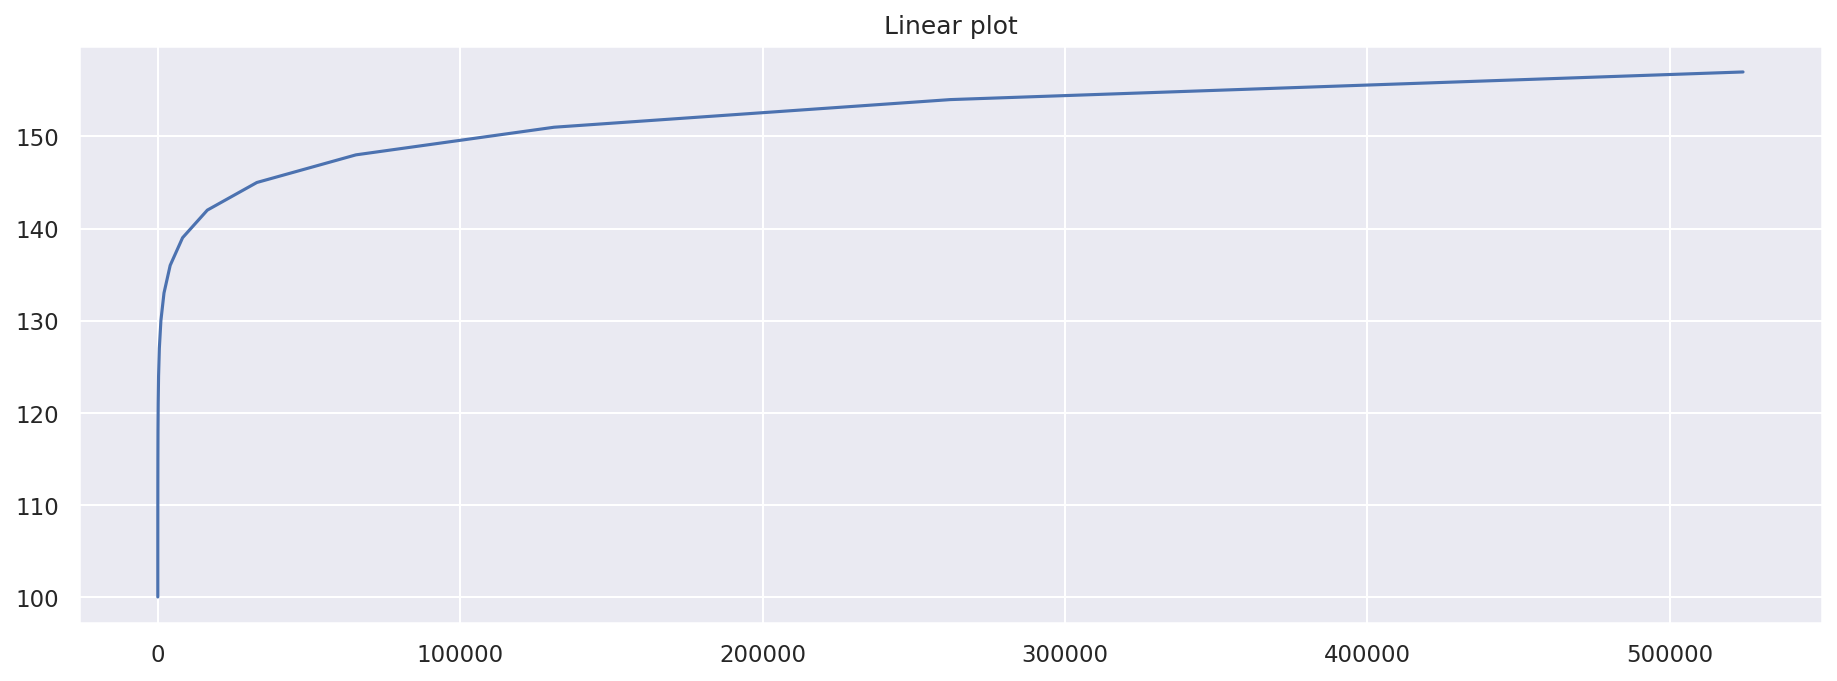

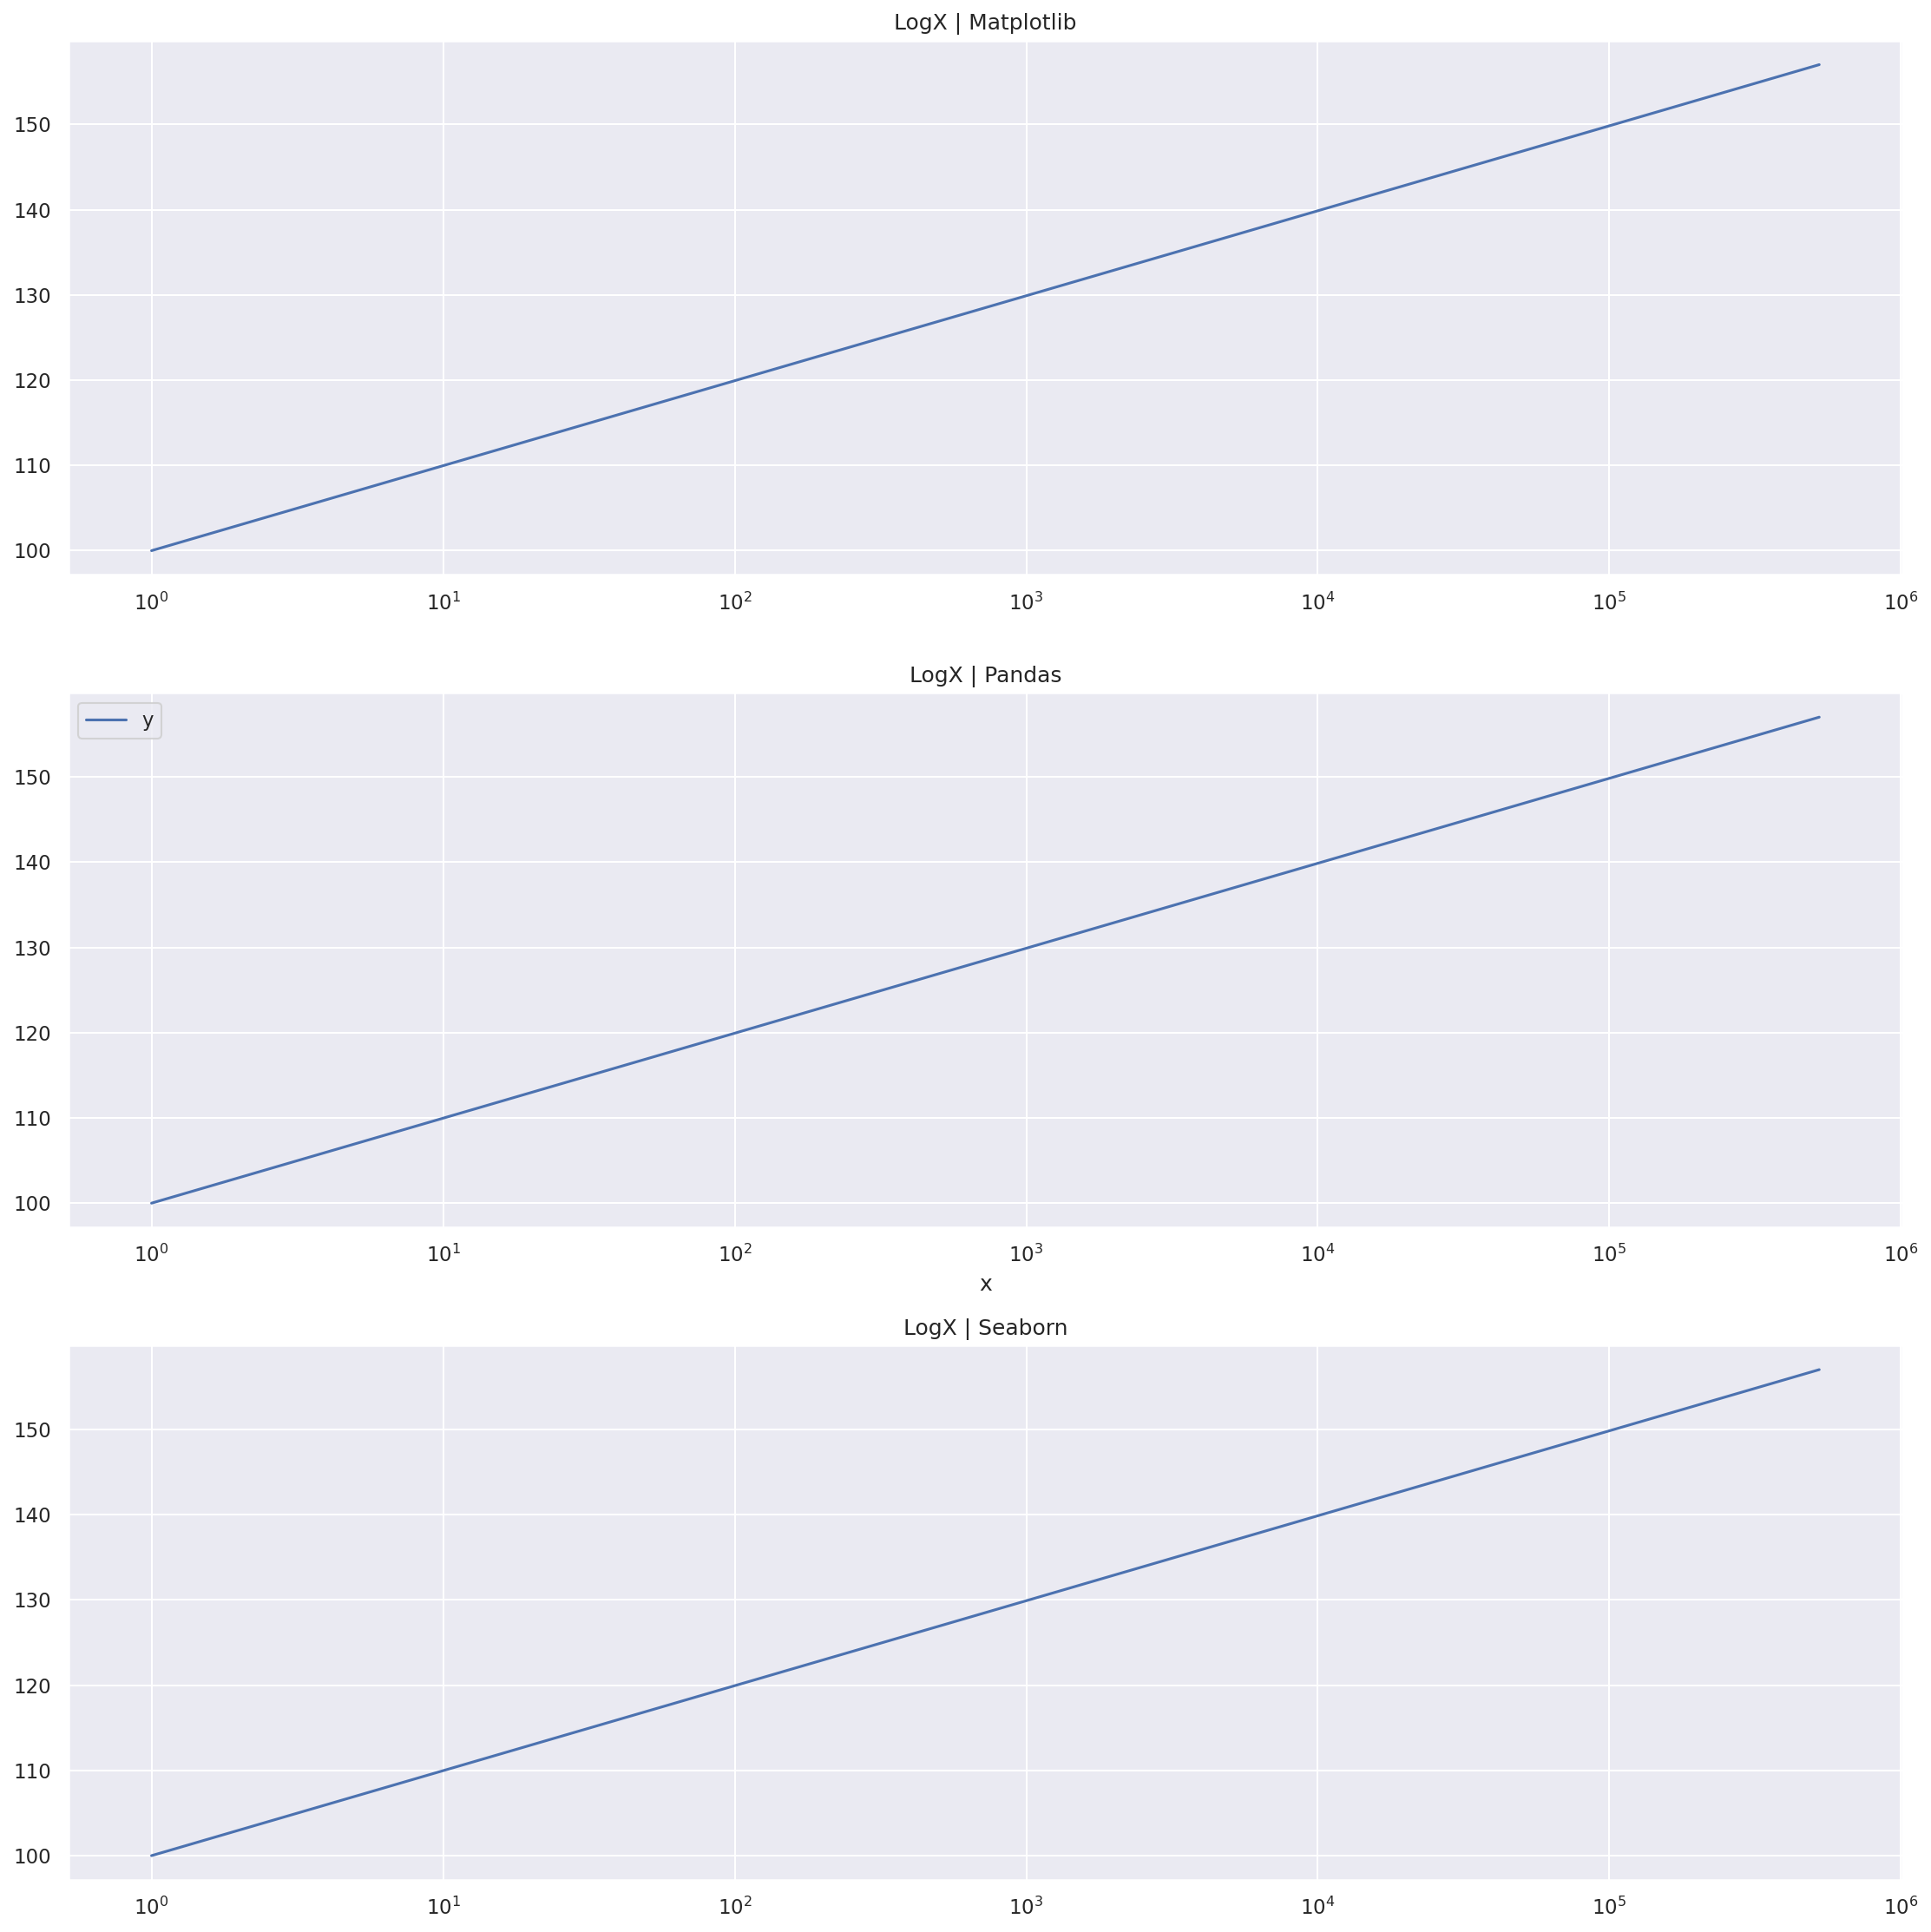

In [ ]:
# Log scale on x-axis only

# Prepare data
y = [ ((3*i) + 100) for i in range(20) ]  # Linear growth
x = [ 2**i for i in range(20) ]           # Exponential growth

# Plot one separated graph with linear scale (for comparison)
plt.figure(figsize=(15,5),dpi=150)
plt.title('Linear plot')
plt.plot(x,y)
plt.show()

# Prepare the subplots of 3 rows and 1 column
nrows, ncols = 3,1
fig, ax = plt.subplots(nrows, ncols)
fig.set_size_inches(15,15)
fig.set_dpi(150)

# Iterate to plot each subplot
titles = {(0,0):'LogX | Matplotlib', (1,0):'LogX | Pandas', (2,0):'LogX | Seaborn' }
for i in range(nrows):
  for j in range(ncols):
    # Set title of a particular subplot
    ax[i].set_title(titles[(i,j)])

    # Plot
    if i==0:    # matplotlib
      ax[i].plot(x,y)
      ax[i].set_xscale('log')   # default:base=10
    elif i==1:  # pandas
      df = pd.DataFrame( {'x':x, 'y':y} )
      df.plot(x='x', y='y', logx=True, ax=ax[i])
    elif i==2:  # seaborn
      sns.lineplot(x=x, y=y, ax=ax[i])
      ax[i].set_xscale('log')   # default:base=10

# Show the figure with subplots
fig.tight_layout()

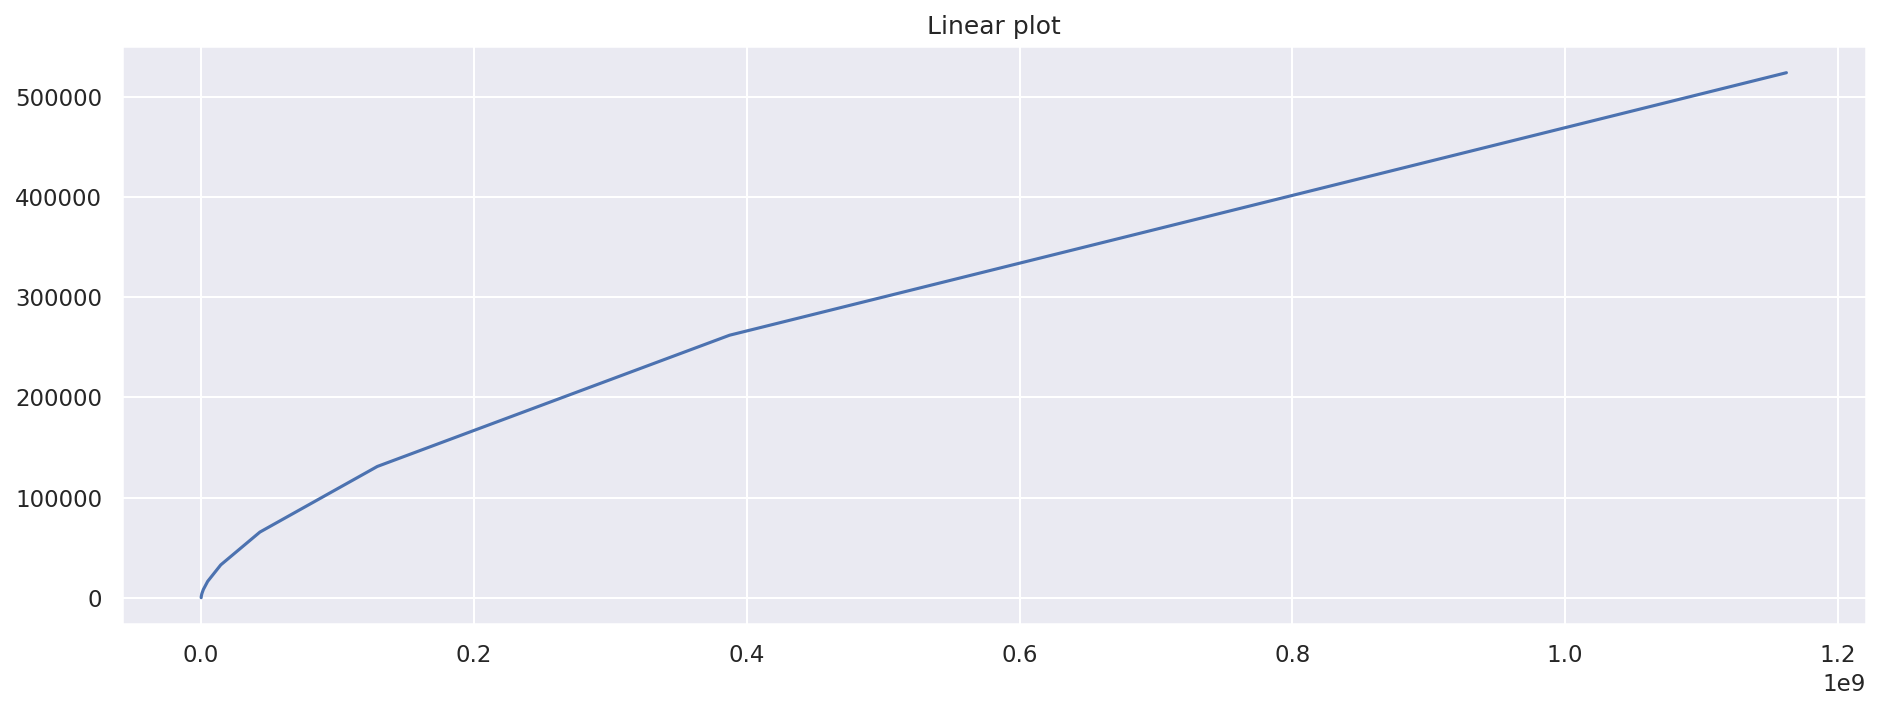

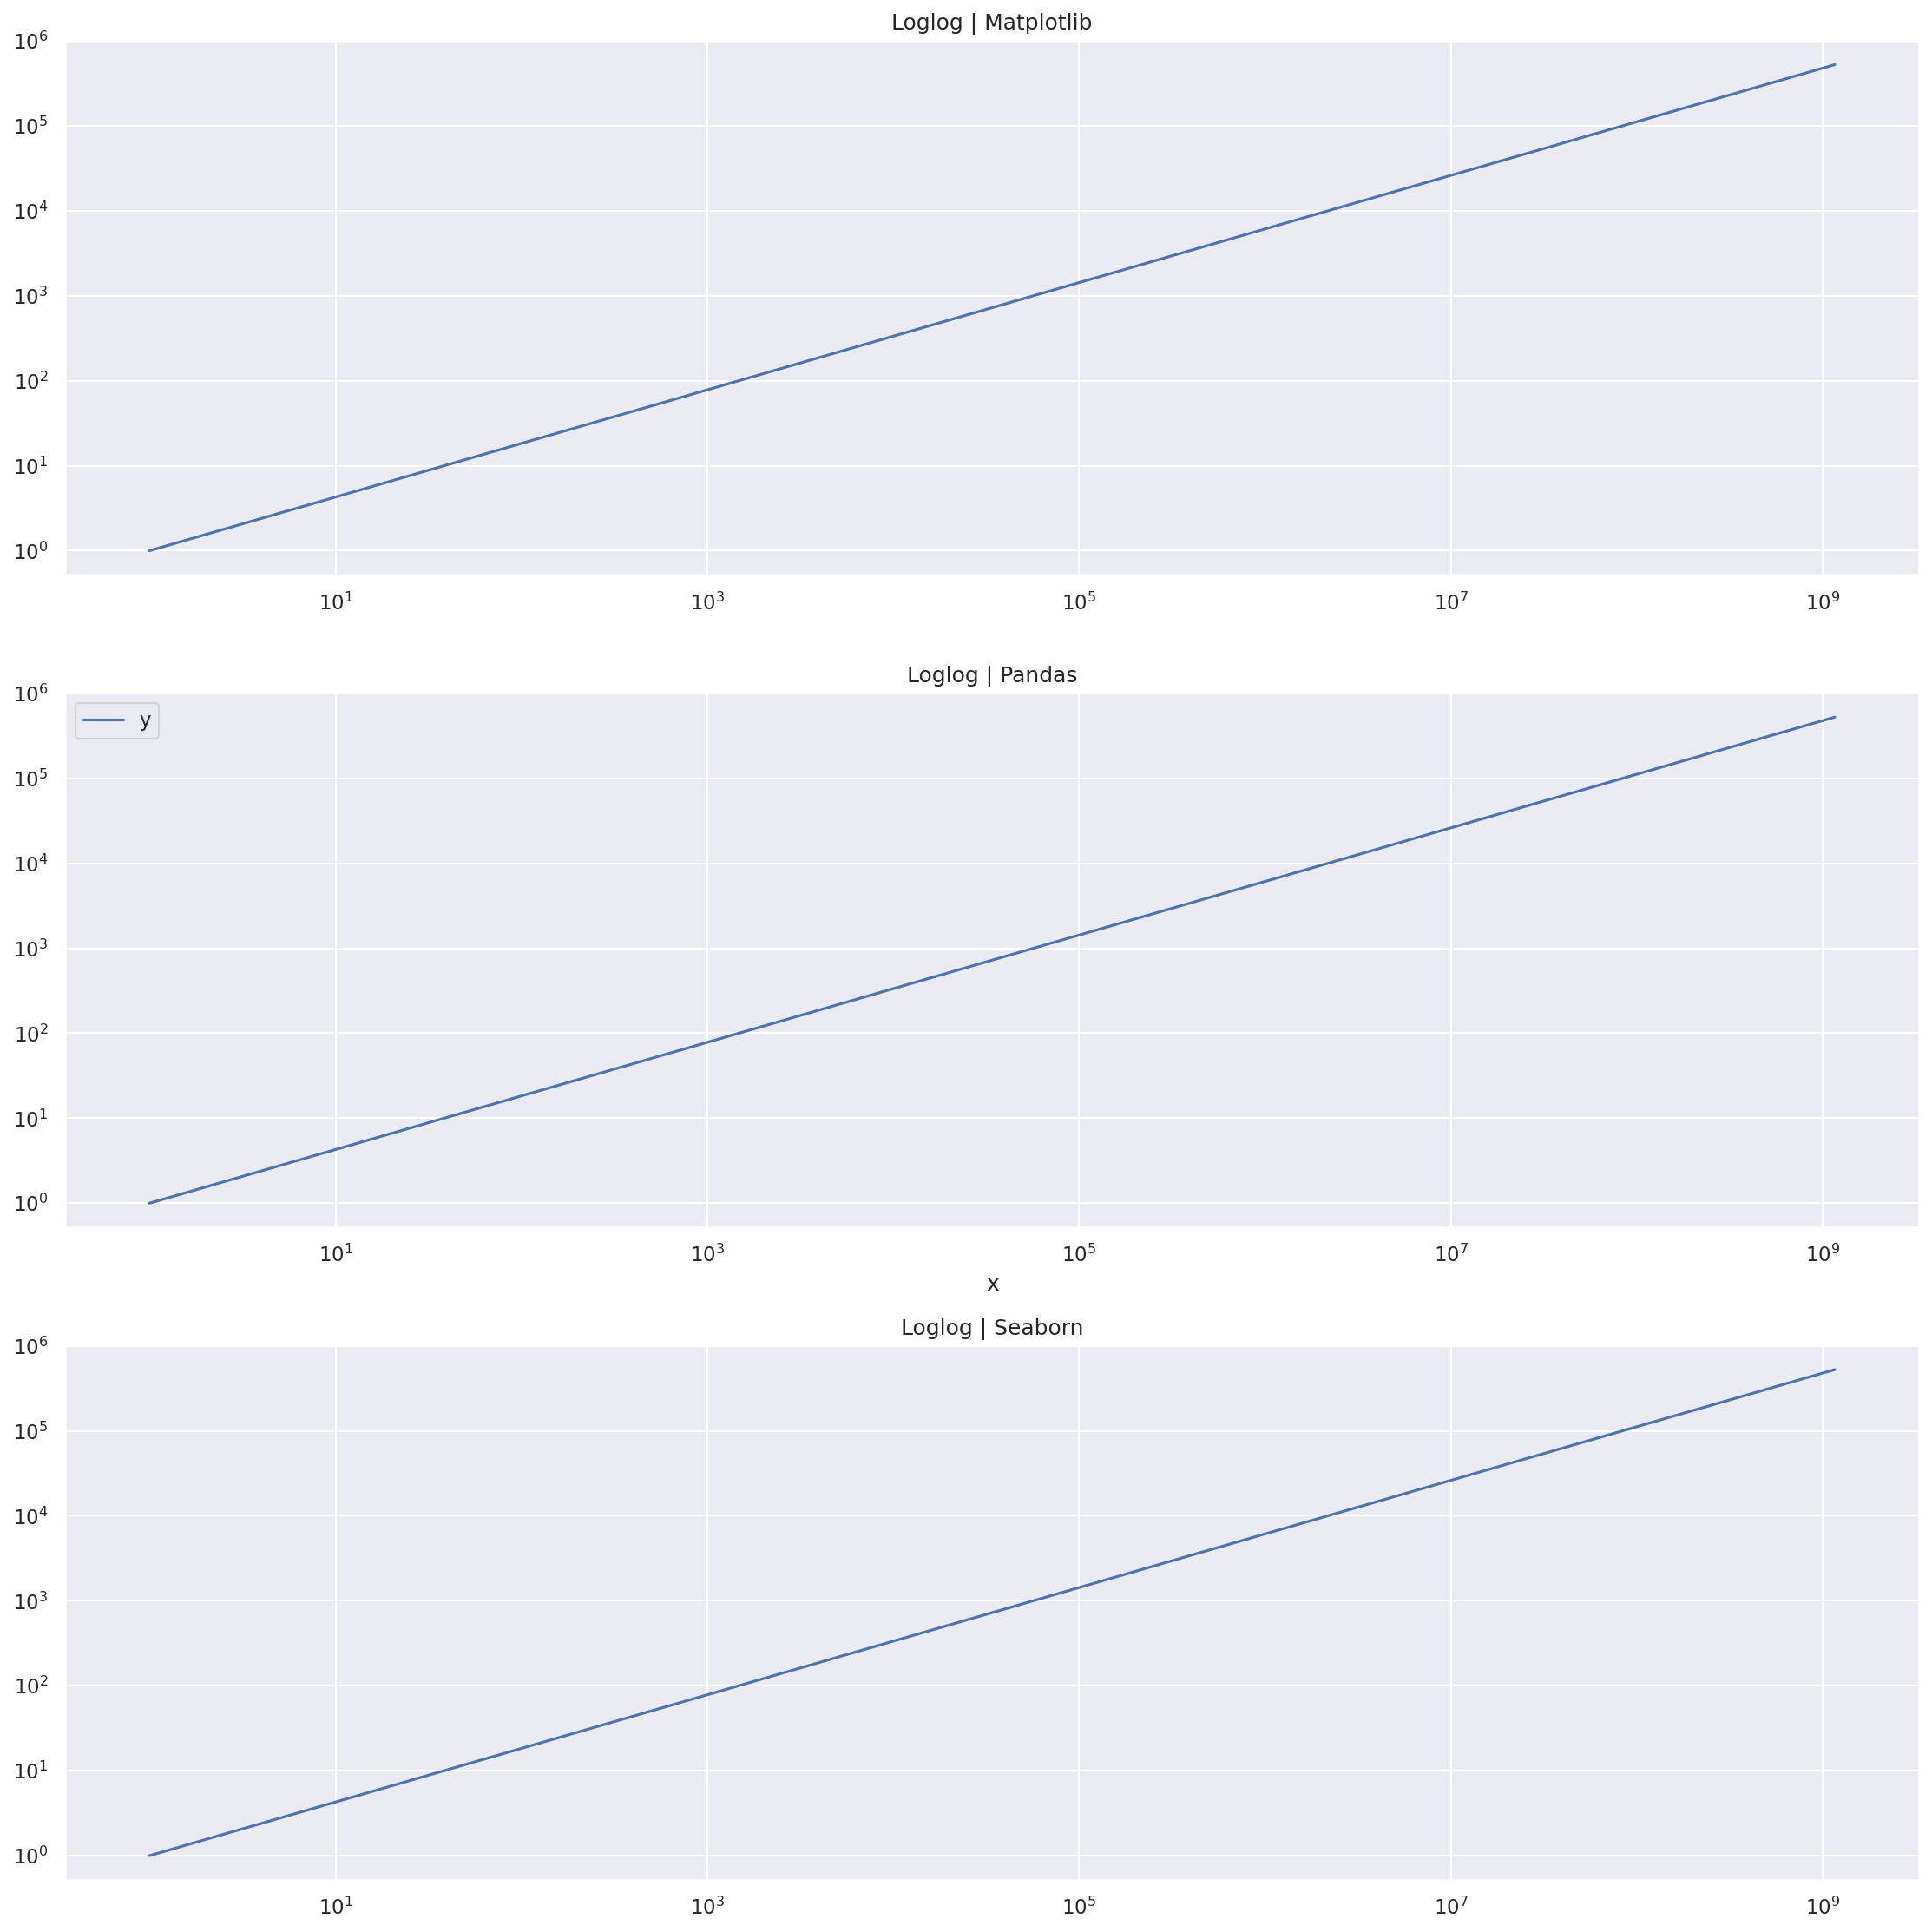

In [ ]:
# Log scale on both axes

# Prepare data
x = [ 3**i for i in range(20) ]  # Exponential growth
y = [ 2**i for i in range(20) ]  # Exponential growth

# Plot one separated graph with linear scale (for comparison)
plt.figure(figsize=(15,5),dpi=150)
plt.title('Linear plot')
plt.plot(x,y)
plt.show()

# Prepare the subplots of 3 rows and 1 column
nrows, ncols = 3,1
fig, ax = plt.subplots(nrows, ncols)
fig.set_size_inches(15,15)
fig.set_dpi(150)

# Iterate to plot each subplot
titles = {(0,0):'Loglog | Matplotlib', (1,0):'Loglog | Pandas', (2,0):'Loglog | Seaborn' }
for i in range(nrows):
  for j in range(ncols):
    # Set title of a particular subplot
    ax[i].set_title(titles[(i,j)])

    # Plot
    if i==0:    # matplotlib
      ax[i].plot(x,y)
      ax[i].set_xscale('log')   # default:base=10
      ax[i].set_yscale('log')   # default:base=10
    elif i==1:  # pandas
      df = pd.DataFrame( {'x':x, 'y':y} )
      df.plot(x='x', y='y', loglog=True, ax=ax[i])
    elif i==2:  # seaborn
      sns.lineplot(x=x, y=y, ax=ax[i])
      ax[i].set_xscale('log')   # default:base=10
      ax[i].set_yscale('log')   # default:base=10

fig.tight_layout()# Show the figure with subplots
fig.tight_layout()